In [1]:
# Remove warnings
import warnings

warnings.filterwarnings('ignore')

# Data manipulation 
import pandas as pd
# Dates handling
from datetime import datetime, timedelta
import pytz
from dateutil.relativedelta import relativedelta
# Chart modules
import matplotlib.pyplot as plt
import seaborn as sns

# Linear algrebra
import numpy as np


# Technical indicators
from ta.momentum import stochrsi
from ta.trend import ema_indicator

from modules.Utils.utils import loadFromDB, strategyTester
from modules.Utils.indicators import computeSuperTrend

In [2]:
SYMBOL='BTC'
df = loadFromDB(f'../backtest_tools/database/database/KuCoin/15m/{SYMBOL}-USDT.csv')
df['EMA20'] = ema_indicator(df.Close,28)
df['EMA50'] = ema_indicator(df.Close,54)
df['Stoch_RSI'] = stochrsi(df.Close, 12, smooth1=3, smooth2=3)
df.dropna(inplace=True)
df.tail()

,Open,High,Low,Close,Volume,Timestamp,EMA20,EMA50,Stoch_RSI
Date,,,,,,,,,
2022-08-24 20:30:00,21700.7,21702.7,21637.8,21696.8,50.942502,1661365800,21587.219025,21517.245179,0.218503
2022-08-24 20:45:00,21696.7,21698.7,21658.8,21674.4,30.403080,1661366700,21593.231506,21522.959900,0.094602
2022-08-24 21:00:00,21674.4,21755.0,21673.1,21753.6,87.543094,1661367600,21604.291402,21531.346813,0.570439
2022-08-24 21:15:00,21750.8,21771.9,21724.9,21741.9,62.861295,1661368500,21613.781650,21539.003292,0.604066
2022-08-24 21:30:00,21741.9,21802.7,21741.8,21793.1,55.754473,1661369400,21626.148433,21548.243173,0.926341


In [4]:
df_day = loadFromDB(f'../backtest_tools/database/database/Binance/1d/{SYMBOL}-USDT.csv')
df_day = computeSuperTrend(df_day)
df_day.dropna(inplace=True)
df_day.tail()


,Open,High,Low,Close,Volume,Timestamp,ST_Direction
Date,,,,,,,
2022-09-19 02:00:00,19417.45,19686.20,18232.56,19537.02,380512.40306,1663545600,True
2022-09-20 02:00:00,19537.02,19634.62,18711.87,18875.00,324098.32860,1663632000,False
2022-09-21 02:00:00,18874.31,19956.00,18125.98,18461.36,385034.10021,1663718400,False
2022-09-22 02:00:00,18461.36,19550.17,18356.39,19401.63,379321.72111,1663804800,False
2022-09-23 02:00:00,19401.63,19500.00,18835.00,18853.05,158892.65969,1663891200,False


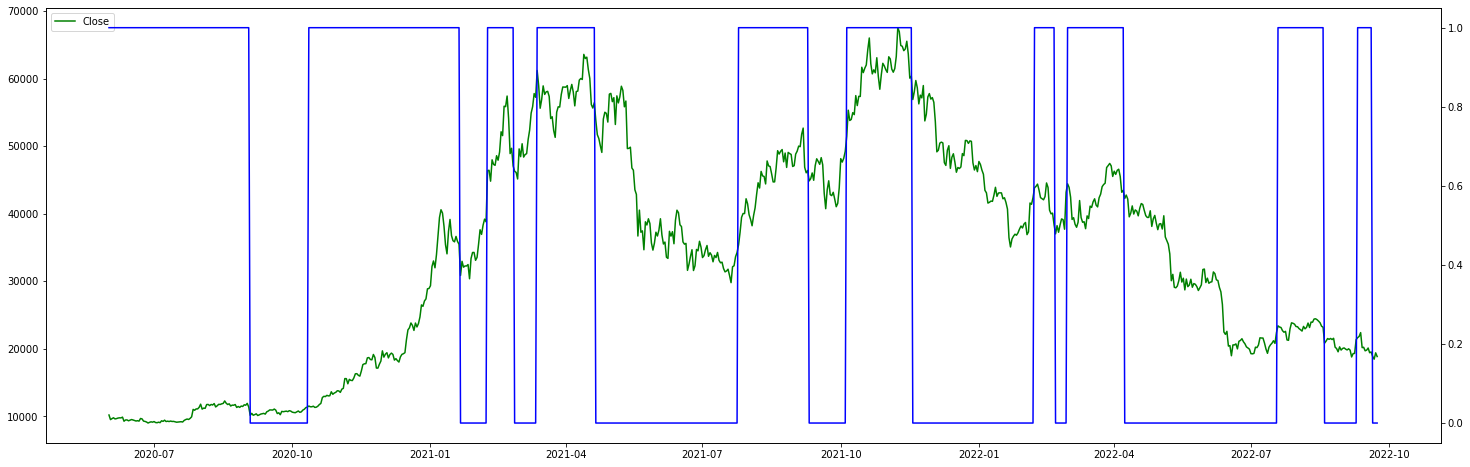

In [5]:
fig, ax = plt.subplots(1, figsize=(25,8))

ax.plot(df_day.Close, color='green',label='Close')
ax1 = ax.twinx()
ax1.plot(df_day.ST_Direction, color='blue',label='super_trend_direction')
ax.legend(loc="upper left")

In [6]:
df_day

,Open,High,Low,Close,Volume,Timestamp,ST_Direction
Date,,,,,,,
2020-06-01 02:00:00,9448.27,10380.00,9421.67,10200.77,76649.126960,1590969600,True
2020-06-02 02:00:00,10202.71,10228.99,9266.00,9518.04,108970.773151,1591056000,True
2020-06-03 02:00:00,9518.02,9690.00,9365.21,9666.24,46252.644939,1591142400,True
2020-06-04 02:00:00,9666.32,9881.63,9450.00,9789.06,57456.100969,1591228800,True
2020-06-05 02:00:00,9788.14,9854.75,9581.00,9621.16,47788.050050,1591315200,True
...,...,...,...,...,...,...,...
2022-09-19 02:00:00,19417.45,19686.20,18232.56,19537.02,380512.403060,1663545600,True
2022-09-20 02:00:00,19537.02,19634.62,18711.87,18875.00,324098.328600,1663632000,False
2022-09-21 02:00:00,18874.31,19956.00,18125.98,18461.36,385034.100210,1663718400,False


In [7]:
def addST(x):
    try:
        return df_day.loc[pd.to_datetime(x.name).date().strftime("%Y-%m-%d")].ST_Direction.values[0]
    except:
        return np.nan
    
df['ST_day'] = df.apply(addST,axis=1)
df.head(30)

,Open,High,Low,Close,Volume,Timestamp,EMA20,EMA50,Stoch_RSI,ST_day
Date,,,,,,,,,,
2020-01-01 14:15:00,7218.3,7221.4,7215.5,7219.2,3.359898,1577884500,7211.521945,7208.531344,0.636703,NaN
2020-01-01 14:30:00,7219.1,7228.4,7219.1,7226.5,2.837141,1577885400,7212.554914,7209.184750,0.842405,NaN
2020-01-01 14:45:00,7226.4,7226.5,7217.3,7220.3,2.673617,1577886300,7213.089058,7209.588940,0.613997,NaN
2020-01-01 15:00:00,7220.4,7221.6,7211.1,7214.1,4.614966,1577887200,7213.158778,7209.752979,0.400696,NaN
2020-01-01 15:15:00,7214.1,7233.0,7214.1,7228.7,4.129044,1577888100,7214.230587,7210.441962,0.822136,NaN
2020-01-01 15:30:00,7228.8,7232.5,7222.4,7225.9,4.451056,1577889000,7215.035374,7211.004072,0.857511,NaN
2020-01-01 15:45:00,7225.8,7226.0,7219.5,7220.7,3.841142,1577889900,7215.426038,7211.356651,0.440850,NaN
2020-01-01 16:00:00,7221.0,7228.5,7221.0,7224.3,2.924610,1577890800,7216.038035,7211.827318,0.563751,NaN
2020-01-01 16:15:00,7224.2,7225.4,7219.4,7225.2,2.878685,1577891700,7216.669895,7212.313598,0.628237,NaN


Period : [2020-01-01 14:15:00] -> [2022-08-24 21:30:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 2240.61 $
Performance vs US Dollar : 124.06 %
Buy and Hold Performence : 201.88 %
Performance vs Buy and Hold : -38.55 %
Best trade : +23.81 %, the 2021-01-04 00:00:00
Worst trade : -5.21 %, the 2021-03-24 21:30:00
Worst drawBack : -19.0 %
Total fees :  616.22 $

----- Trades Informations -----
Total trades on period : 254
Number of positive trades : 80
Number of negative trades :  174
Trades win rate ratio : 31.5 %
Average trades performance : 0.46 %
Average positive trades : 4.27 %
Average negative trades : -1.29 %

----- Plot -----


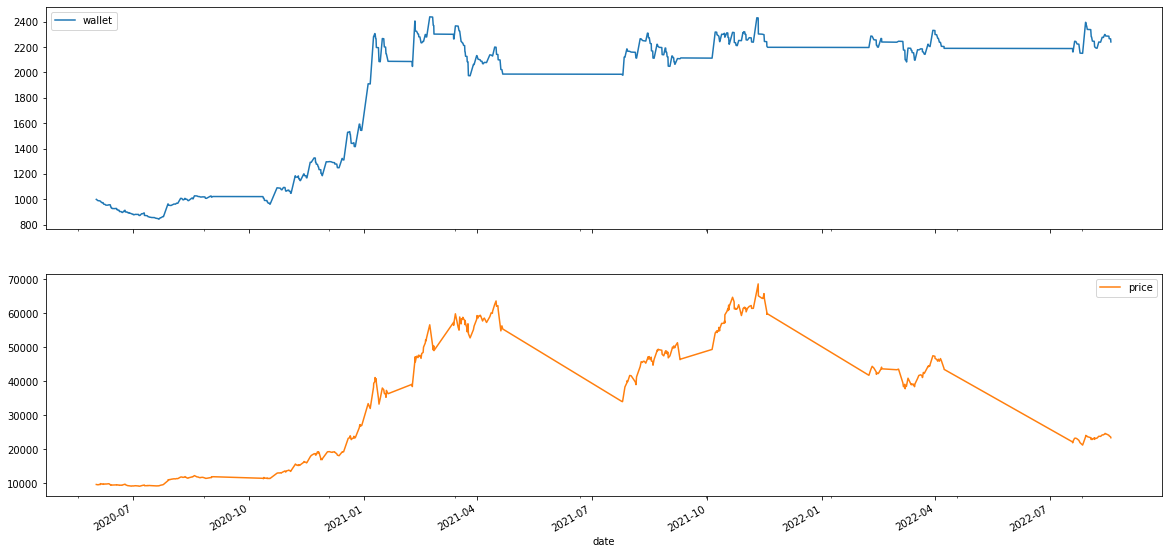

In [12]:
def buyCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if row.EMA20>row.EMA50 and row.Stoch_RSI>0.82 and previous_row.Stoch_RSI<0.82 and row.ST_day==True else False
    #return True if row.EMA20>row.EMA50 and row.Stoch_RSI<0.82 else False

def sellCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if row.EMA20<row.EMA50 and row.Stoch_RSI>0.18 and previous_row.Stoch_RSI<0.18  else False


equity = strategyTester(df,buyCondition,sellCondition)